# Ride-sharing Data Analysis for Zuber Launch

# Contents <a id='back'></a>

* [Introduction](#introduction)
* [Data Overview](#data_overview)
    * [Initialization](#initialization)
    * [Load Data](load_data)
* [Prepare the Data](#prepare_data)
    * [Viewing the Data](#view_data)
    * [Fix Data](#fix_data)
* [Analyze the Data](#analyze_data) 
* [Test statistical hypothesis](#hypothesis)
    * [Hypothesis](#hypothesis_one)
* [Conclusion](#conclusion)

# Introduction <a id='introduction'></a>

You're working as an analyst for Zuber, a new ride-sharing company that's launching in Chicago. Your task is to find patterns in the available information. You want to understand passenger preferences and the impact of external factors on rides.
Working with a database, the data from competitors will be analyzed and hypothesis test about the impact of weather on ride frequency.

To begin the project, data on weather in Chicago in November 2017 was parsed from [https://practicum-content.s3.us-west-1.amazonaws.com/data-analyst-eng/moved_chicago_weather_2017.html]. Afterwards, exploratory data analysis was done on a database containing info on taxi rides in Chicago to use the available data to show a table containing information on rides from the Loop to O'Hare International Airport. The results from that query will be used to test the hypothesis about the impact of weather on ride frequency.
    
[Back to Contents](#back)

# Data Overview <a id='data_overview'></a>

## Initialization <a id='initialization'><a class="tocSkip">

In [1]:
# Loading all the libraries
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st

## Load Data <a id='load_data'></a> <a class="tocSkip">

In [2]:
# Load the data file into DataFrames
df_01 = pd.read_csv('/datasets/project_sql_result_01.csv')
df_04 = pd.read_csv('/datasets/project_sql_result_04.csv')

# Prepare the data <a id='prepare_data'></a>

## Viewing the data <a id='view_data'></a> <a class="tocSkip">

In [3]:
# Print the general/summary information about the DataFrames
df_01.info()
print()
df_04.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [4]:
# Print a sample of data for the dataframes
display(df_01)
print()
display(df_04)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,2241 - 44667 - Felman Corp,3


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


## Fix data <a id='fix_data'></a> <a class="tocSkip">

In [5]:
# checking for duplicated rows
print(df_01.duplicated().sum())
print(df_04.duplicated().sum())
print()

# checking for duplicates in first column of respective dataframes
print(df_01.duplicated(subset='company_name').sum())
print(df_04.duplicated(subset='dropoff_location_name').sum())
print()

# checking for implicit duplicates
sorted_df_01 = sorted(df_01['company_name'].unique())
print(sorted_df_01)
print()

sorted_df_04 = sorted(df_04['dropoff_location_name'].unique())
print(sorted_df_04)

0
0

0
0

['0118 - 42111 Godfrey S. Awir', '1085 - 72312 N and W Cab Co', '1469 - 64126 Omar Jada', '2092 - 61288 Sbeih Company', '2192 - 73487 Zeymane Corp', '2241 - 44667 - Felman Corp', '24 Seven Taxi', '2733 - 74600 Benny Jona', '2809 - 95474 C & D Cab Co Inc.', '2823 - 73307 Lee Express Inc', '3011 - 66308 JBL Cab Inc.', '303 Taxi', '3556 - 36214 RC Andrews Cab', '3591 - 63480 Chuks Cab', '3620 - 52292 David K. Cab Corp.', '3623 - 72222 Arrington Enterprises', '3721 - Santamaria Express', '4053 - 40193 Adwar H. Nikola', '4615 - 83503 Tyrone Henderson', '4623 - 27290 Jay Kim', '5 Star Taxi', '5006 - 39261 Salifu Bawa', '5062 - 34841 Sam Mestas', '5074 - 54002 Ahzmi Inc', '5874 - 73628 Sergey Cab Corp.', '5997 - 65283 AW Services Inc.', '6057 - 24657 Richard Addo', '6574 - Babylon Express Inc.', '6742 - 83735 Tasha Ride Inc', '6743 - 78771 Luhak Corp', 'American United', 'American United Taxi Affiliation', 'Blue Diamond', 'Blue Ribbon Taxi Association Inc.', 'Checker Taxi', 'Checker

Based on the data preprocessing, there are no missing values or duplicates. Datatypes can also remain as is, and there is no improper formatting with heading titles.

# Analyze the data <a id='analyze_data'></a>

In [6]:
# identify the top 10 neighborhoods in terms of drop-offs

# Sorting the DataFrame in descending order based on 'average_trips'
df_04_sorted = df_04.sort_values(by='average_trips', ascending=False)

# Selecting the top 10 neighborhoods
top_10_neighborhoods = df_04_sorted.head(10)

display(top_10_neighborhoods)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


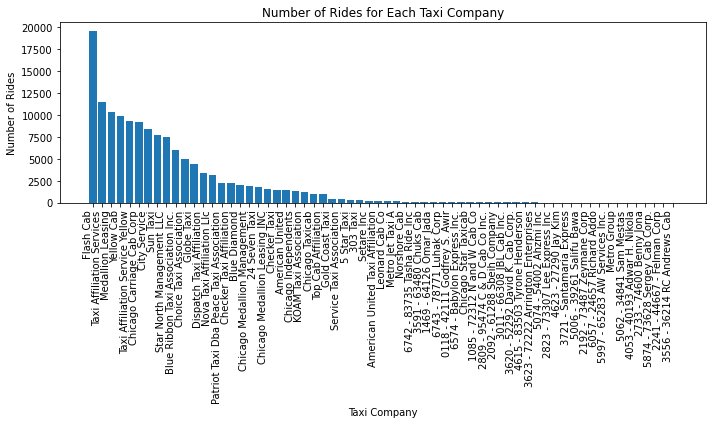

In [7]:
# Create a bar plot for taxi companies and the number of rides
plt.figure(figsize=(10, 6))
plt.bar(df_01['company_name'], df_01['trips_amount'])
plt.xlabel('Taxi Company')
plt.ylabel('Number of Rides')
plt.title('Number of Rides for Each Taxi Company')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

Flash Cab by far has the most number of rides compared to all the other taxi companies with almost 20000 rides, while the company with the second most taxi rides, Taxi Affiliation Services, has about 12000. There is a gradual decline seen in the bar graph for the succeeding taxi companies, with the lower half of taxi companies have barely visible data seen on the graph. It is noted however that most of the taxi companies with much lower amounts of rides have a series of numbers in their comapny name, which may have made it more difficult for people to look up or remember when trying to book taxi rides, which could be a possible explanation for their lower ride numbers.

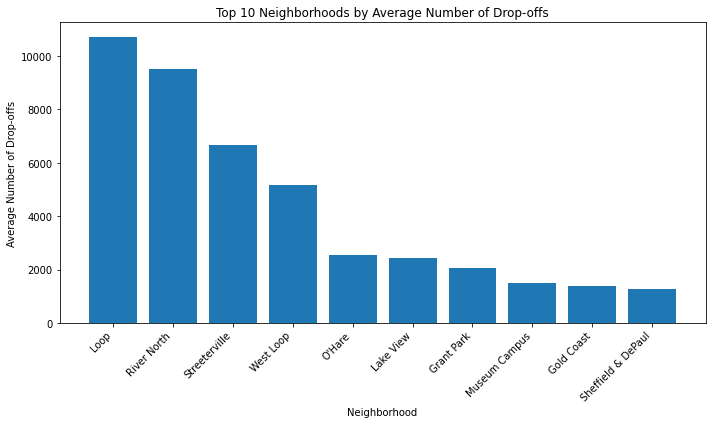

In [8]:
# Create a bar plot for the top 10 neighborhoods by the number of drop-offs
top_10_neighborhoods = df_04.sort_values(by='average_trips', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_10_neighborhoods['dropoff_location_name'], top_10_neighborhoods['average_trips'])
plt.xlabel('Neighborhood')
plt.ylabel('Average Number of Drop-offs')
plt.title('Top 10 Neighborhoods by Average Number of Drop-offs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The Loop has the highest average number of drop-offs of about 10000, which makes sense considering that geographically the Loop is where the main train system is for transportion throughout other areas of Chicago, which would make it easier for people to get to their destination. Afterwards, there is a steady decline in average number of drop-offs which begins to plateau around 3000 drop-offs.

# Test Statistical Hypothesis <a id='hypotheses'></a>

In [9]:
# Load the data file into DataFrames
df_07 = pd.read_csv('/datasets/project_sql_result_07.csv')

In [10]:
# Print the general/summary information about the DataFrames
df_07.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [11]:
# Print a sample of data for the dataframes
display(df_07)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


## Hypothesis <a id='hypotheses_one'></a> <a class="tocSkip">

Null Hypothesis (H0): The average duration of rides from the Loop to O'Hare International Airport is the same on rainy Saturdays as on other days.

Alternative Hypothesis (HA): The average duration of rides from the Loop to O'Hare International Airport is different on rainy Saturdays compared to other days.

We will use a two-sample t-test to compare the average duration of rides between the rainy Saturdays and other days. The t-test compares the means of two groups (rainy Saturdays vs. other days) and provides a p-value, which indicates the probability of observing the data under the assumption that the null hypothesis is true.

The significance level (alpha) is the threshold we use to determine whether the results of the hypothesis test are statistically significant or due to chance. A common alpha value is 0.05, which means we are willing to accept a 5% chance of making a Type I error (rejecting the null hypothesis when it is true). However, the significance level can be adjusted depending on the specific requirements and the consequences of making Type I or Type II errors.

In [12]:
df_07['start_ts'] = pd.to_datetime(df_07['start_ts'])

# Separate data for rainy Saturdays and other days
rainy_saturdays_data = df_07[df_07['weather_conditions'] == 'Bad']['duration_seconds']
other_days_data = df_07[df_07['weather_conditions'] == 'Good']['duration_seconds']

# Perform two-sample t-test
alpha = 0.05
results = st.ttest_ind(rainy_saturdays_data, other_days_data, equal_var=False)

print("p-value:", results.pvalue)

# Check the result against the significance level (alpha)
if results.pvalue < alpha:
    print("Reject the null hypothesis. There is a significant difference in average duration between rainy Saturdays and other days.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in average duration between rainy Saturdays and other days.")

p-value: 6.738994326108734e-12
Reject the null hypothesis. There is a significant difference in average duration between rainy Saturdays and other days.


Based on the results of the hypothesis test with a p-value of approximately 6.74e-12 (p < 0.05), we reject the null hypothesis. This indicates that there is a statistically significant difference in the average duration of rides from the Loop to O'Hare International Airport between rainy Saturdays and other days in November 2017.

The extremely low p-value suggests that the observed difference in average ride duration is unlikely to be due to random chance alone. Instead, it provides strong evidence to support the alternative hypothesis, which states that the average duration of rides on rainy Saturdays is different from the average duration on other days.

Therefore, based on this analysis, we can conclude that rainy Saturdays have a significantly different average ride duration compared to other days. Further investigation may be warranted to understand the underlying factors contributing to this difference and to explore potential implications for taxi services during rainy weekends.

# Conclusion <a id='conclusion'></a>

Based on analysis, it appears that taxi companies that contain more complicated names, such as those with a series of numbers within the company name, have significantly lower numbers of taxi rides, perhaps due to it being more difficult to remember or find. The top ten neighborhoods with average number of drop-offs were also found. The Loop contains the most. Using those results would be beneficial when starting up a new ride-share company to know which areas of Chicago are most popular to have a larger clientele.

Based on the hypothesis test to determine if the average duratin of rides from the Loop to O'Hare International Airport changes on rainy Saturdays, it was concluded that there is a sgnificant difference when the Saturdays are rainy comapred to other days. This result makes sense considering that people would most likely not want to be walking in the rain and prefer to getting a ride. However, to truly understand the underlying factors that contribute to this difference, further investigation may be needed.